<a href="https://colab.research.google.com/github/Siddhi-S-Thakur/EDA-RealEstate/blob/main/EDA_on_Realtydataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

### Load data into file

In [ ]:
df = pd.read_csv('/content/Realty_Dataset.csv')

In [ ]:
df.head()

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price
0,1,Delhi NCR,Villa,2636,1,3,28,18,25,Fully Furnished,"pool,lift,garden",1.36,4,01-01-2020,51687000
1,2,Chennai,Apartment,3461,4,4,17,7,7,Semi-Furnished,lift,7.70,4,02-01-2020,46438000
2,3,Pune,Penthouse,1783,5,2,6,25,4,Unfurnished,"gym,parking,clubhouse,security,lift,pool",1.75,5,03-01-2020,23251000
3,4,Chennai,Villa,833,4,1,15,16,1,Fully Furnished,"parking,security,clubhouse,lift,pool,garden,gym",4.80,2,04-01-2020,13036000
4,5,Bangalore,Apartment,2139,3,3,5,6,17,Fully Furnished,"gym,pool,lift",4.67,2,05-01-2020,35756000


### Check shape(rows * columns), columns, datatypes

In [ ]:
df.shape


(1500, 15)

In [ ]:
df.columns.values


array(['property_id', 'location', 'property_type', 'size_sqft',
       'num_bedrooms', 'num_bathrooms', 'floor_number', 'total_floors',
       'age_years', 'furnishing', 'amenities', 'distance_to_metro_km',
       'view_score', 'date_listed', 'price'], dtype=object)

In [ ]:
df.dtypes

,0
property_id,int64
location,object
property_type,object
size_sqft,int64
num_bedrooms,int64
num_bathrooms,int64
floor_number,int64
total_floors,int64
age_years,int64
furnishing,object


In [7]:
df.describe()

,property_id,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,distance_to_metro_km,view_score,price
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,750.500000,2675.685333,3.040667,2.483333,15.065333,21.878000,14.224000,5.148787,2.946000,4.567594e+07
std,433.157015,1344.269228,1.415750,1.120071,8.419520,10.085646,8.579913,2.820607,1.399186,2.720719e+07
min,1.000000,351.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.110000,1.000000,2.384000e+06
25%,375.750000,1507.250000,2.000000,1.000000,8.000000,13.000000,7.000000,2.750000,2.000000,2.502275e+07
50%,750.500000,2668.500000,3.000000,2.000000,15.000000,22.000000,14.000000,5.240000,3.000000,4.146500e+07
75%,1125.250000,3854.750000,4.000000,3.000000,22.000000,31.000000,21.000000,7.580000,4.000000,5.876725e+07
max,1500.000000,4997.000000,5.000000,4.000000,29.000000,39.000000,29.000000,10.000000,5.000000,1.335480e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           1500 non-null   int64  
 1   location              1500 non-null   object 
 2   property_type         1500 non-null   object 
 3   size_sqft             1500 non-null   int64  
 4   num_bedrooms          1500 non-null   int64  
 5   num_bathrooms         1500 non-null   int64  
 6   floor_number          1500 non-null   int64  
 7   total_floors          1500 non-null   int64  
 8   age_years             1500 non-null   int64  
 9   furnishing            1500 non-null   object 
 10  amenities             1500 non-null   object 
 11  distance_to_metro_km  1500 non-null   float64
 12  view_score            1500 non-null   int64  
 13  date_listed           1500 non-null   object 
 14  price                 1500 non-null   int64  
dtypes: float64(1), int64(

### To count total number of missing values in each column. isna() return true value if column missing i.e 1 then sum counts total number of true values.

In [9]:
df.isna().sum()

,0
property_id,0
location,0
property_type,0
size_sqft,0
num_bedrooms,0
num_bathrooms,0
floor_number,0
total_floors,0
age_years,0
furnishing,0


### Explanation
##### column_names = ['num_bedrooms', 'num_bathrooms', 'floor_number', 'total_floors', 'age_years', 'distance_to_metro_km', 'view_score', 'price']

Purpose: Defines the list of column names (features) from your DataFrame (df) that you want to analyze.

Each string in this list corresponds to a feature in your real estate dataset (like number of bedrooms, price, etc.).​

fig, ax = plt.subplots(4, 2, figsize = (20, 10))

plt.subplots(4, 2): Creates a figure and a 4-row by 2-column grid of subplots (8 axes total).

fig: The entire figure window/container for all plots.​

ax: A 2D NumPy array (shape 4x2) where each entry is a subplot (axis object) in the grid.

figsize = (20, 10): Sets the size of the overall figure in inches (20 wide, 10 tall) to ensure plots are big and readable.​

axes = ax.flatten()

.flatten(): Converts the 2D array ax into a flat (1D) array called axes, so you can easily loop through the subplots using a single index for each of your 8 features.​

for i, column in enumerate(column_names):

enumerate(column_names): Iterates over column_names, giving you both the index (i, from 0 to 7) and the feature name (column). This index matches the subplots.​

axes[i].hist(df[column], bins=30, color='skyblue', edgecolor='black')

axes[i]: Selects the i-th subplot (axis) from your grid.​

.hist(df[column], bins=30, ...): Draws a histogram of the given feature (values in df[column]).

bins=30: Splits the data range into 30 intervals (bars) for the histogram.

color='skyblue': Bars are sky blue for better visual clarity.

edgecolor='black': Each bar has a black border for readability.​

axes[i].set_title(f'Distribution of {column}')

.set_title(...): Sets the title of the subplot to "Distribution of <feature name>" for easier interpretation.​

axes[i].set_xlabel(column)

.set_xlabel(...): Labels the x-axis with the feature name, so viewers know which variable is shown.​

axes[i].set_ylabel('Frequency')

.set_ylabel(...): Labels the y-axis as “Frequency”, indicating counts of occurrences for each bin/bar.​

plt.tight_layout()

Purpose: Adjusts the space between subplots so titles, labels, and axes don't overlap, making sure the layout is neat.​

plt.show()

Purpose: Displays the entire figure with all subplots and their respective histograms

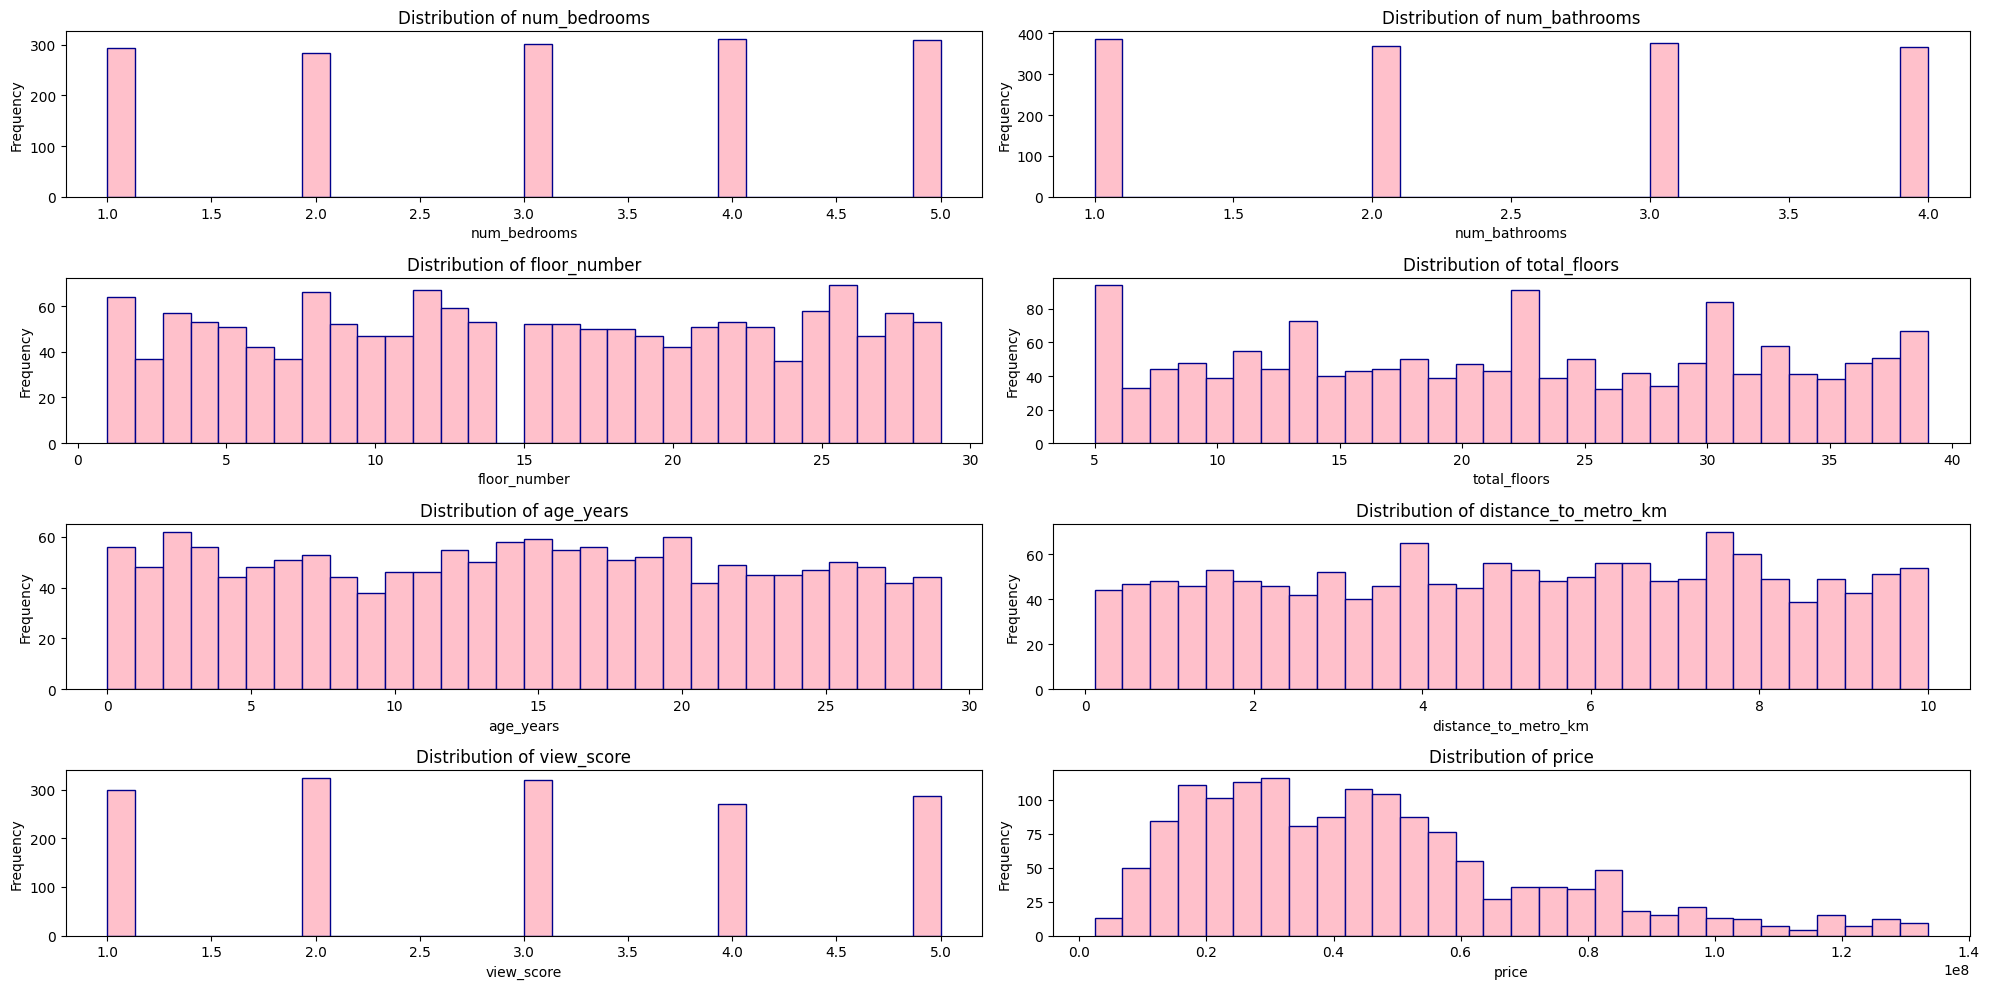

In [16]:
column_names = ['num_bedrooms','num_bathrooms','floor_number','total_floors','age_years','distance_to_metro_km','view_score','price']

fig, ax = plt.subplots(4,2, figsize = (20,10))
axes = ax.flatten()

for i,column in enumerate(column_names):
  axes[i].hist(df[column], bins = 30, color ='pink', edgecolor='darkblue')
  axes[i].set_title(f'Distribution of {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

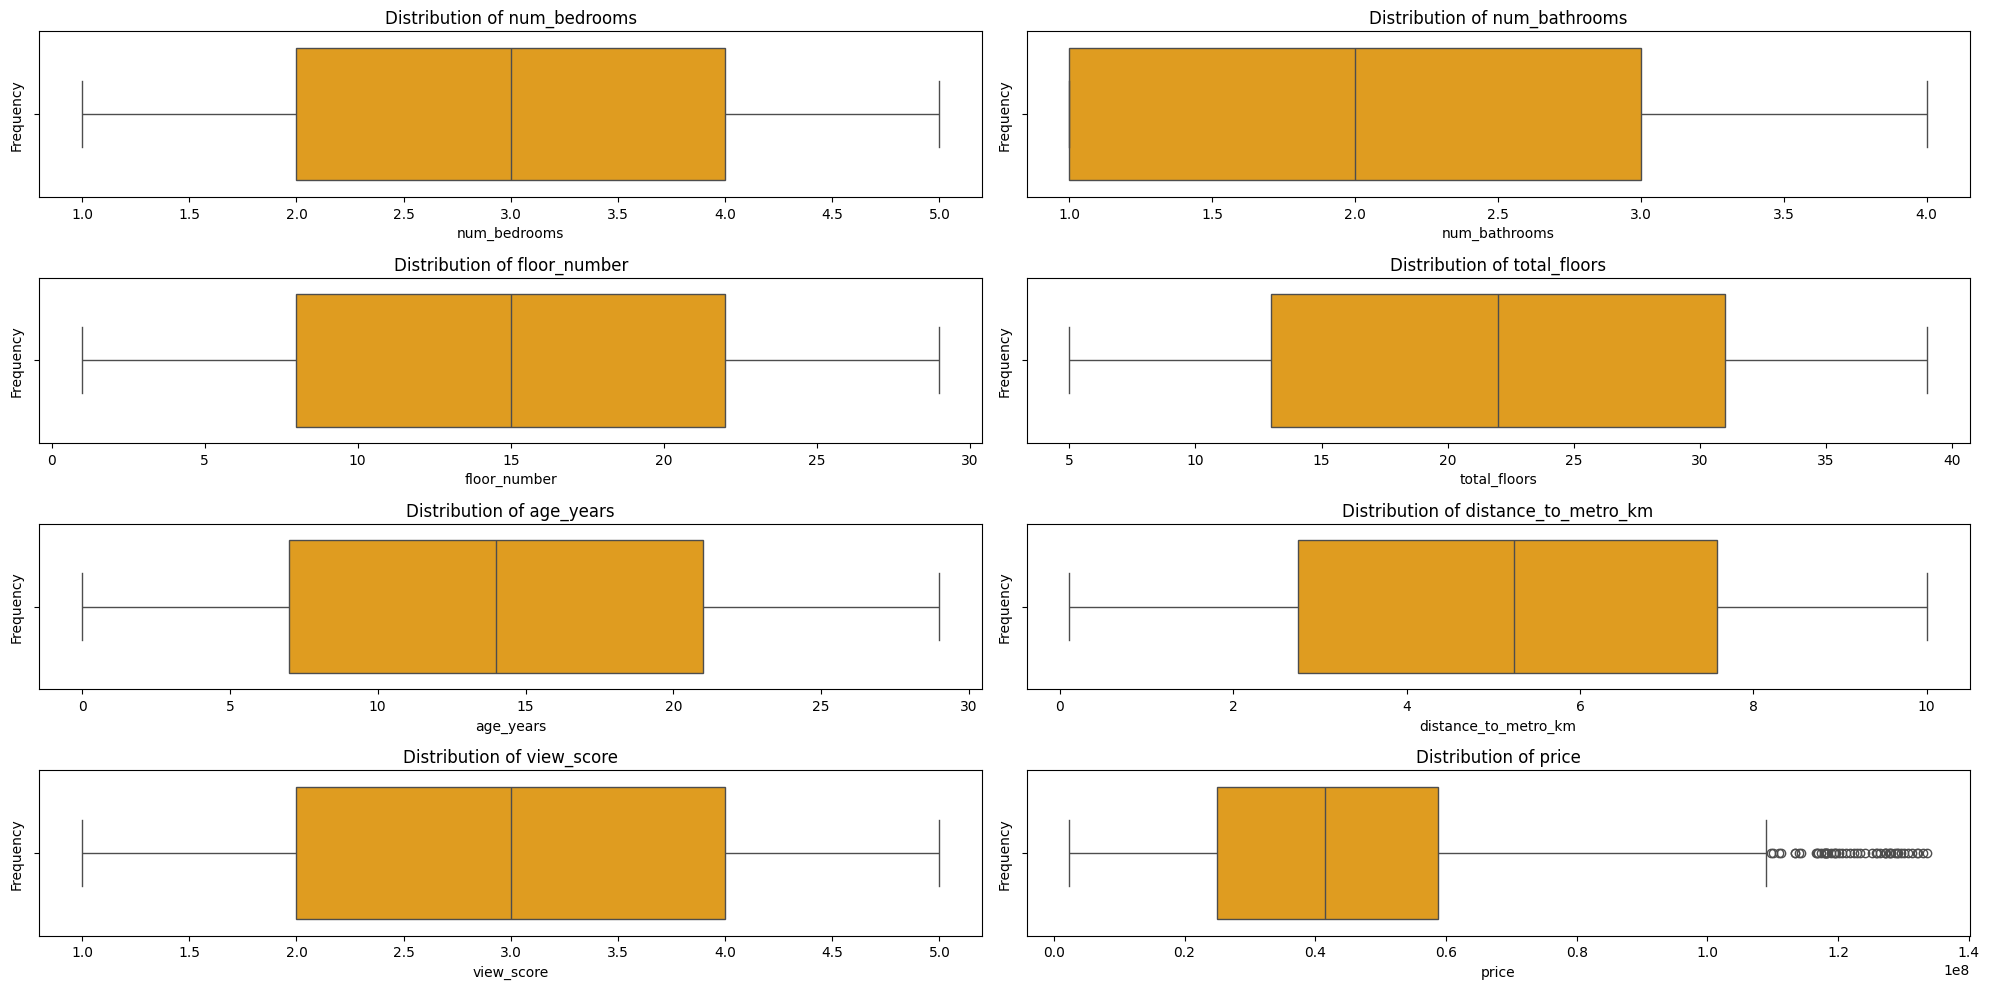

In [21]:
column_names = ['num_bedrooms','num_bathrooms','floor_number','total_floors','age_years','distance_to_metro_km','view_score','price']

fig, ax = plt.subplots(4,2, figsize = (20,10))
axes = ax.flatten()

for i,column in enumerate(column_names):
  sns.boxplot(x = df[column], ax = axes[i],color='orange')
  axes[i].set_title(f'Distribution of {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Skewness
##### Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [22]:
df['price'].skew()

np.float64(0.9616196871655859)

### Z-score
##### df['zscore'] = zscore(df['price']) calculates the z-score for each value in the "price" column of your DataFrame df.

A z-score indicates how many standard deviations a data point is from the mean of the data. It is computed as
z=x−μ/σ
where
x is the data point,
μ is the mean, and
σ is the standard deviation of the "price" data.

The resulting z-scores are stored in a new column in the DataFrame named "zscore".

In [23]:
from scipy.stats import zscore

df['zscore'] = zscore(df['price'])

In [24]:
df.head()

,property_id,location,property_type,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,furnishing,amenities,distance_to_metro_km,view_score,date_listed,price,zscore
0,1,Delhi NCR,Villa,2636,1,3,28,18,25,Fully Furnished,"pool,lift,garden",1.36,4,01-01-2020,51687000,0.221010
1,2,Chennai,Apartment,3461,4,4,17,7,7,Semi-Furnished,lift,7.70,4,02-01-2020,46438000,0.028019
2,3,Pune,Penthouse,1783,5,2,6,25,4,Unfurnished,"gym,parking,clubhouse,security,lift,pool",1.75,5,03-01-2020,23251000,-0.824503
3,4,Chennai,Villa,833,4,1,15,16,1,Fully Furnished,"parking,security,clubhouse,lift,pool,garden,gym",4.80,2,04-01-2020,13036000,-1.200081
4,5,Bangalore,Apartment,2139,3,3,5,6,17,Fully Furnished,"gym,pool,lift",4.67,2,05-01-2020,35756000,-0.364729
